In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, rand_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
pd.set_option('display.max_columns', None)
df = pd.read_csv('df_arabica_clean.csv')
#sweetness, defects, clean cup and uniformity all 10 for every row
# df = df.drop(columns=['ICO Number', 'Unnamed: 0', 'ID', 'Sweetness', 'Clean Cup', 'Defects', 'Uniformity'])
df = df.fillna('N/A')
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,N/A,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,N/A,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,N/A,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,N/A,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,N/A,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [176]:
numCountries = len(df['Country of Origin'].value_counts())

flavMetrics = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
keepCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin', 'Moisture Percentage']
scoreCols = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']
print(keepCols)
df = df[keepCols]

# drop outlier with moisture percentage of 0
df = df.loc[df['Moisture Percentage'] > 0]

# converts scores out of 10 to 0-1 scale
for i in scoreCols:
    df[i] = df[i].apply(lambda x: x / 10.0)

# converts moisture percentage to 0-1 scale
df['Moisture Percentage'] = df['Moisture Percentage'].apply(lambda x: x / 100.0)

X = df.drop(columns='Country of Origin')
y = df['Country of Origin']
df.head()

['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Country of Origin', 'Moisture Percentage']


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Country of Origin,Moisture Percentage
0,0.858,0.850,0.842,0.858,0.825,0.842,Colombia,0.118
1,0.850,0.850,0.792,0.800,0.792,0.825,Taiwan,0.105
2,0.833,0.842,0.808,0.817,0.792,0.817,Laos,0.104
3,0.808,0.817,0.817,0.825,0.817,0.808,Costa Rica,0.118
4,0.833,0.833,0.808,0.825,0.792,0.792,Colombia,0.116


<Axes: xlabel='Aroma', ylabel='Count'>

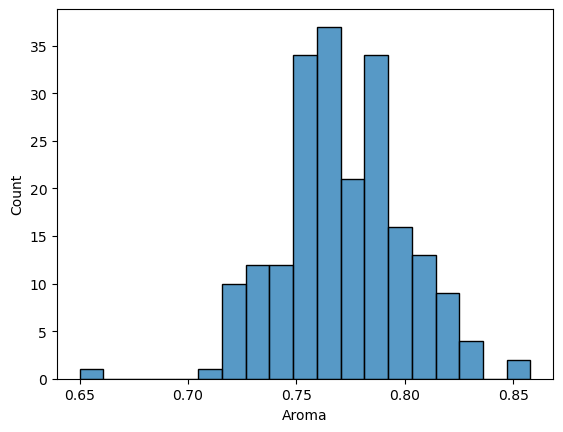

In [177]:
sns.histplot(data=df[scoreCols[0]])

<Axes: xlabel='Flavor', ylabel='Count'>

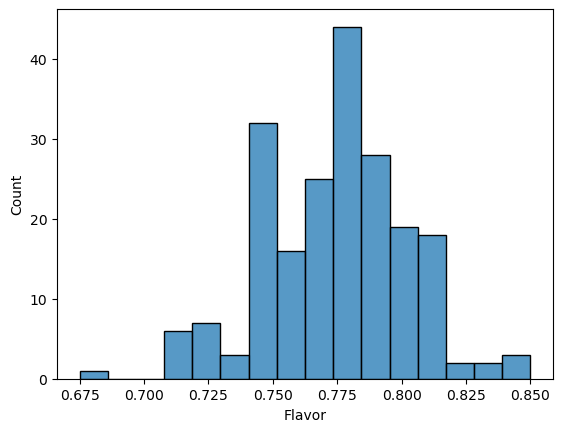

In [178]:
sns.histplot(data=df[scoreCols[1]])

<Axes: xlabel='Aftertaste', ylabel='Count'>

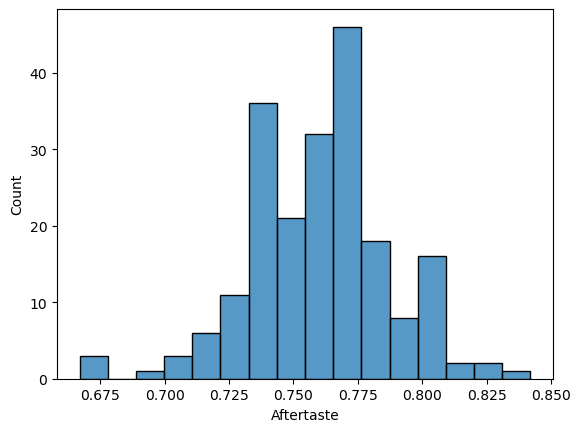

In [179]:
sns.histplot(data=df[scoreCols[2]])

<Axes: xlabel='Acidity', ylabel='Count'>

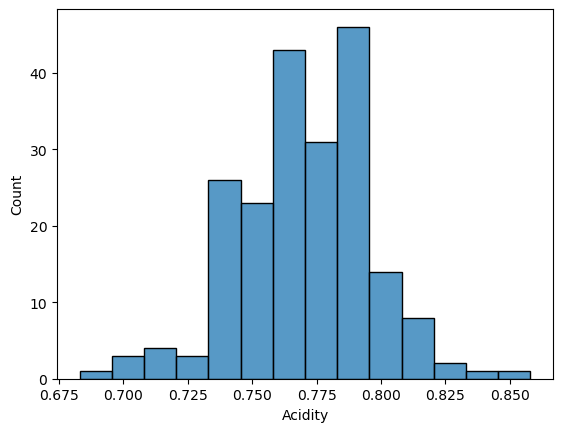

In [180]:
sns.histplot(data=df[scoreCols[3]])

<Axes: xlabel='Body', ylabel='Count'>

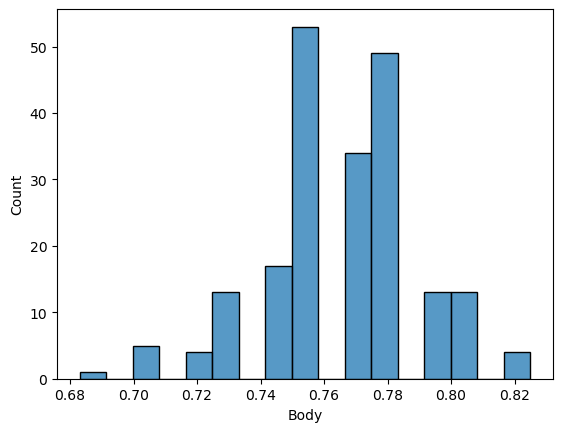

In [181]:
sns.histplot(data=df[scoreCols[4]])

<Axes: xlabel='Moisture Percentage', ylabel='Count'>

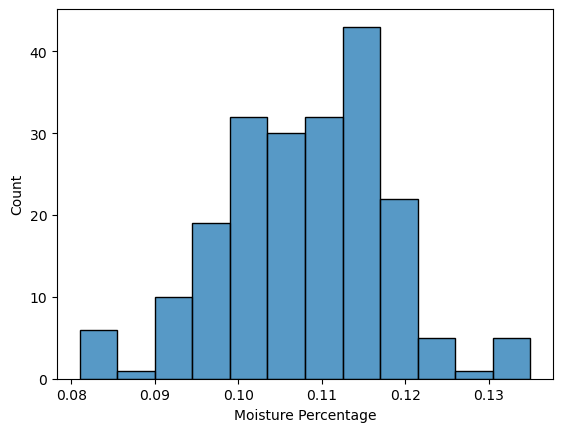

In [182]:
sns.histplot(data=df['Moisture Percentage'])

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/d

2: 0.39041949764866807
3: 0.31508427525611976
4: 0.27615148706602527
5: 0.25367784650306324
6: 0.20080120970980975
7: 0.18052737755080447
8: 0.15797654226407032
9: 0.16494751296729115
10: 0.17084542824679175
11: 0.17004277712990598
12: 0.15589661736654276
13: 0.16211059720725854
14: 0.15832129833872816
15: 0.1548215644444892
16: 0.14364428455676617
17: 0.1446043115777162
18: 0.15421828888991806
19: 0.14519123455662883
20: 0.15248683068768562
21: 0.14457148885414509
22: 0.1483177441903538
23: 0.14865140365006915
24: 0.15625068538338954
25: 0.15311459430938743
26: 0.15138037037299837
27: 0.1554748316810169
28: 0.14844980503906935
29: 0.1499771719767816


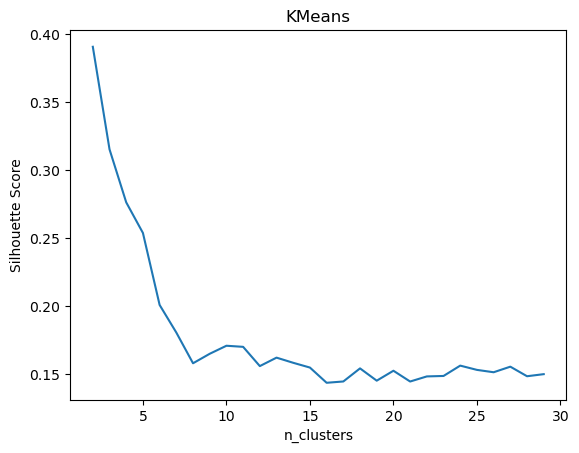

In [184]:
from sklearn.cluster import KMeans
silScores = []
nClusts = []
randScores = []

for i in range(2, 30):
    kmModel = KMeans(n_clusters=i)
    pred = kmModel.fit_predict(X)
    silScores.append(silhouette_score(X, pred))
    randScores.append(rand_score(y, pred))
    nClusts.append(i)

sns.lineplot(x=nClusts, y=silScores).set(title='KMeans', xlabel='n_clusters', ylabel='Silhouette Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {silScores[i]}")
#elbow method suggests about 5 clusters

2: 0.5144210277054226
3: 0.6246744020838266
4: 0.6617570447549136
5: 0.7105375325597916
6: 0.7500828794695714
7: 0.7594600994553635
8: 0.775562396400663
9: 0.7967795406109401
10: 0.8042150130239166
11: 0.8044044518115084
12: 0.8114610466493014
13: 0.8190385981529719
14: 0.814160549372484
15: 0.829978688136396
16: 0.8269003078380298
17: 0.8287473360170495
18: 0.83310442813166
19: 0.833057068434762
20: 0.8399242244849633
21: 0.8365616860052095
22: 0.8421974899360644
23: 0.8363722472176178
24: 0.849585602652143
25: 0.8475964953824295
26: 0.8453232299313285
27: 0.8492067250769595
28: 0.8500118399242245
29: 0.8570210750651196


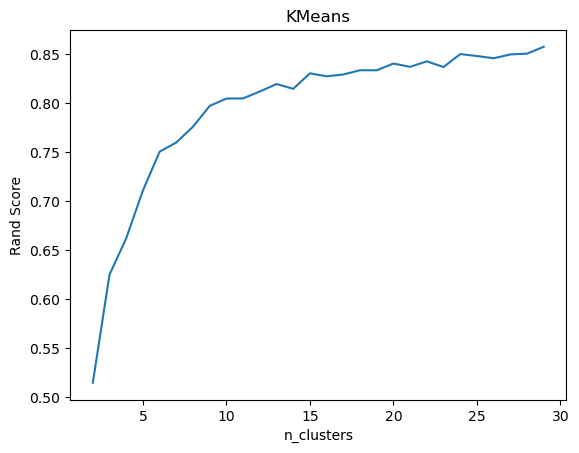

In [185]:
sns.lineplot(x=nClusts, y=randScores).set(title='KMeans', xlabel='n_clusters', ylabel='Rand Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {randScores[i]}")

In [186]:
from sklearn.cluster import KMeans

kmModel = KMeans(n_clusters=5)

kmModel.fit(X)

print(kmModel.inertia_)

0.2293623720101315


/Users/derek/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2: 0.372377834213105
3: 0.33916411202441876
4: 0.236404529195746
5: 0.2315690203747128
6: 0.189706094134625
7: 0.17339662486303933
8: 0.1755924518550513
9: 0.17417937281723456
10: 0.14917543887719314
11: 0.1405251250944847
12: 0.14319763945681122
13: 0.1522852722944865
14: 0.1533149475352078
15: 0.14898763806571505
16: 0.14682383596291668
17: 0.1418291610897983
18: 0.1424640924719645
19: 0.14226750603947783
20: 0.14597474612499264
21: 0.14876737200860843
22: 0.15072817399376565
23: 0.15392169659126712
24: 0.15368104177147954
25: 0.16019122381607856
26: 0.15975298734103288
27: 0.15882236452046936
28: 0.1613096710734619
29: 0.15896998860830336


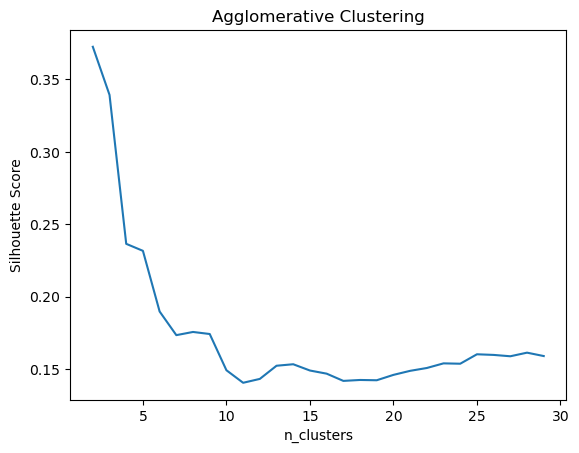

In [187]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

nClusts = []
silScores = []
randScores = []

for i in range(2, 30):
    agg = AgglomerativeClustering(n_clusters=i, metric='euclidean')
    agg.fit(X)
    nClusts.append(i)
    silScores.append(silhouette_score(X, agg.labels_))
    randScores.append(rand_score(y, agg.labels_))

sns.lineplot(x=nClusts, y=silScores).set(title='Agglomerative Clustering', xlabel='n_clusters', ylabel='Silhouette Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {silScores[i]}")

#11 is smallest number of clusters

2: 0.49116741652853424
3: 0.5623964006630358
4: 0.6811745204830689
5: 0.7109164101349751
6: 0.7380535164574946
7: 0.7628226379351172
8: 0.7635803930854842
9: 0.7658536585365854
10: 0.8032678190859579
11: 0.8140658299786881
12: 0.8251006393559082
13: 0.8282263793511722
14: 0.8284158181387639
15: 0.831541558134028
16: 0.833057068434762
17: 0.8396874260004736
18: 0.8397347856973716
19: 0.8399715841818612
20: 0.8451811508406346
21: 0.8460336253847975
22: 0.8467913805351646
23: 0.846459862656879
24: 0.8498224011366328
25: 0.851148472649775
26: 0.8521430262846318
27: 0.8536585365853658
28: 0.8541321335543453
29: 0.8549846080985082


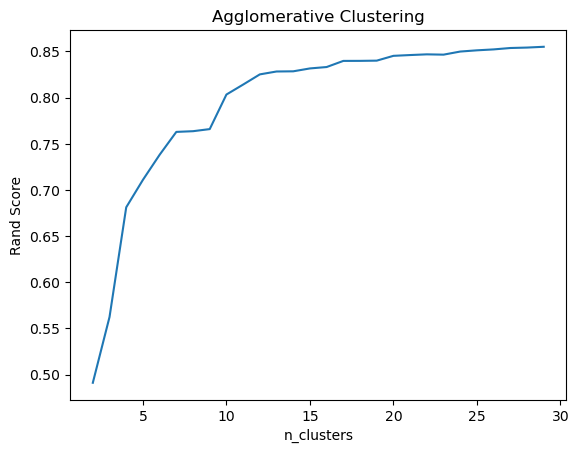

In [188]:
sns.lineplot(x=nClusts, y=randScores).set(title='Agglomerative Clustering', xlabel='n_clusters', ylabel='Rand Score')

for i in range(len(nClusts)):
    print(f"{nClusts[i]}: {randScores[i]}")

2: 0.1471010978641222
3: 0.01629139004791235
4: 0.0859149751426755
5: -0.0692541855388057
6: 0.1311661703938775
7: 0.14822647610483264
8: 0.16724401243153192
9: 0.12699712540927746
10: 0.15605265744827876
11: 0.1087025157984582
12: 0.0971228352319052
13: 0.1422190425940992
14: 0.12370074133013494
15: 0.1387409088896792
16: 0.15466595537477554
17: 0.12435634929665222
18: 0.12958885866108918
19: 0.10448361886948376
20: 0.12752558038472853
21: 0.10259139648436026
22: 0.1375500053599611
23: 0.13558166659393894
24: 0.1251766448521861
25: 0.12463631023791812
26: 0.11192125774235095
27: 0.1098983234665962
28: 0.1207250286577809
29: 0.13313797130010946


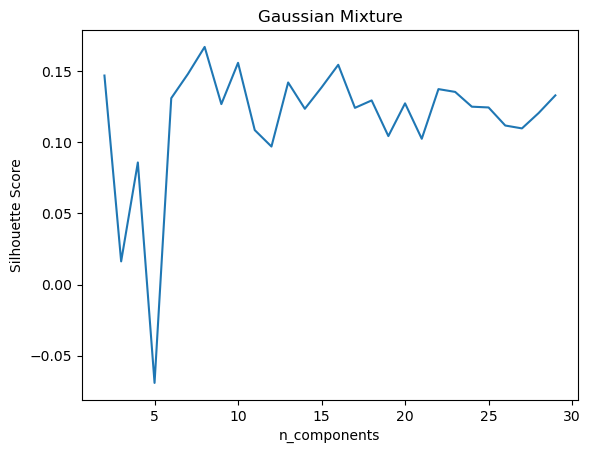

In [189]:
from sklearn.mixture import GaussianMixture

nComps = []
silScores = []
randScores = []
for i in range(2, 30):
    gmm = GaussianMixture(n_components=i)
    pred = gmm.fit_predict(X)
    silScores.append(silhouette_score(X, pred))
    nComps.append(i)
    randScores.append(rand_score(y, pred))

sns.lineplot(x=nComps, y=silScores).set(title='Gaussian Mixture', xlabel='n_components', ylabel='Silhouette Score')

for i in range(len(nComps)):
    print(f"{nComps[i]}: {silScores[i]}")

2: 0.4823585129055174
3: 0.4846317783566185
4: 0.5990528060620413
5: 0.57954061094009
6: 0.7310442813165996
7: 0.7616386455126687
8: 0.7795879706369879
9: 0.8044044518115084
10: 0.7951693109164102
11: 0.8017996684821217
12: 0.8179019654274212
13: 0.8017996684821217
14: 0.8161970163390955
15: 0.8102770542268529
16: 0.8269003078380298
17: 0.8313047596495382
18: 0.8392138290314942
19: 0.8371300023679848
20: 0.8351882547951693
21: 0.842576367511248
22: 0.8432394032678191
23: 0.8406819796353303
24: 0.8443286762964717
25: 0.8502012787118163
26: 0.848070092351409
27: 0.8516220696187544
28: 0.8506748756807957
29: 0.8528060620412029


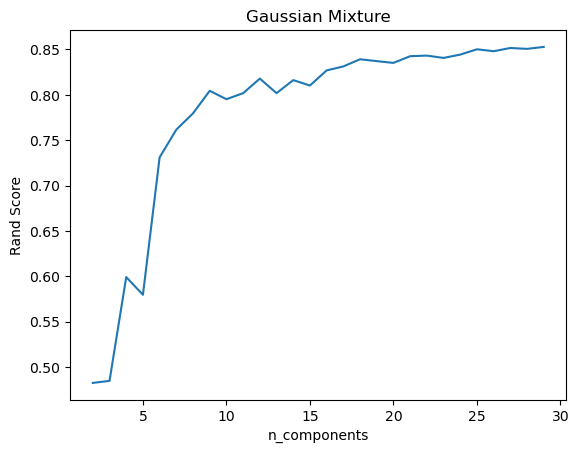

In [190]:
sns.lineplot(x=nComps, y=randScores).set(title='Gaussian Mixture', xlabel='n_components', ylabel='Rand Score')

for i in range(len(nComps)):
    print(f"{nComps[i]}: {randScores[i]}")